In this Notebook we are doing feature extraction using a pre-trained convolutional base (VGG16) and training a simple classifier on top of these features.

In [1]:
from keras.preprocessing import image
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import os


C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
def preprocess_image(image_path,target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_arr = image.img_to_array(img)
    return img_arr

In [3]:
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

In [4]:
base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation') 

In [5]:
def extract_features(directory,sample_count):
     
    datagen = ImageDataGenerator(rescale=1./255) 
    batch_size=20
    
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')  
    
    i=0
    for input_batch, label_batch in generator:
        feature_batch = conv_base.predict(input_batch)  
        features[i*batch_size:(i+1)*batch_size] = feature_batch
        labels[i*batch_size:(i+1)*batch_size] = label_batch  
        i+=1
        if i* batch_size>=sample_count:
            break
            
    return features,labels

 
train_features, train_labels = extract_features(train_dir, 1000)
validation_features, validation_labels = extract_features(validation_dir, 200)
test_features, test_labels = extract_features(test_dir, 200)
train_features = np.reshape(train_features, (1000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (200, 4 * 4 * 512))
test_features = np.reshape(test_features, (200, 4 * 4 * 512))

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 200 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 200 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [6]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu',input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30



50/50 [==============================] - 3s 40ms/step - loss: 1.0498 - acc: 0.6120 - val_loss: 0.6952 - val_acc: 0.5600
Epoch 2/30
50/50 [==============================] - 2s 31ms/step - loss: 0.5639 - acc: 0.7190 - val_loss: 0.5184 - val_acc: 0.7850
Epoch 3/30
50/50 [==============================] - 2s 32ms/step - loss: 0.5047 - acc: 0.7660 - val_loss: 0.5233 - val_acc: 0.8000
Epoch 4/30
50/50 [==============================] - 2s 36ms/step - loss: 0.4483 - acc: 0.7840 - val_loss: 0.6016 - val_acc: 0.7350
Epoch 5/30
50/50 [==============================] - 2s 33ms/step - loss: 0.4064 - acc: 0.8120 - val_loss: 0.7145 - val_acc: 0.6300
Epoch 6/30
50/50 [==============================] - 2s 34ms/step - loss: 0.3599 - acc: 0.8340 - val_loss: 0.5555 - val_acc: 0.7200
Epoch 7/30
50/50 [==============================] - 2s 36ms/step - loss: 0.3462 - acc: 0.8300 - val_loss: 0.5051 - val_acc: 0.7650
Epoch 8/30
50/50 [==============================] - 2s 37ms/step - loss: 0.3055 - acc: 0.8590 

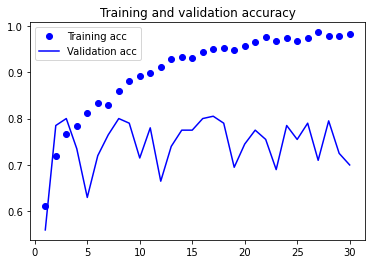

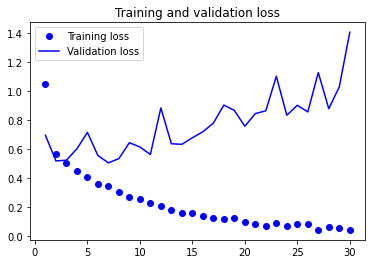

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img_path = 'C:/Users/rani/Desktop/Documents/ruchi1.jpg'
your_target_size=(150,150)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(your_target_size))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)


features = conv_base.predict(img_array)

# Flatten the features
features_flatten = features.reshape((1, 4 * 4 * 512))

# Make predictions using the trained model
predictions = model.predict(features_flatten)

# Interpret the results (assuming binary classification)
class_label = "Formal" if predictions[0][0] < 0.5 else "Informal"
confidence = predictions[0][0]

print(f"Predicted class: {class_label}")
print(f"Confidence: {confidence}")

1/1 [==============================] - 0s 20ms/step
Predicted class: Informal
Confidence: 1.0


In [12]:
model.save("imageclassification_model_with_98_train_And_70_validation_accuracy.h5")

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Convnet USing pretrained model with Data Augmentation

In [1]:
from keras import models
from keras import layers

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150,150,3))
 

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
conv_base.trainable = False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy
import os 

base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc'])

history = model.fit(
    train_generator,
steps_per_epoch=50,
epochs=30,
validation_data=validation_generator,
validation_steps=10)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 49s 969ms/step - loss: 0.5356 - acc: 0.7310 - val_loss: 0.5568 - val_acc: 0.7450
Epoch 2/30
50/50 [==============================] - 51s 1s/step - loss: 0.5251 - acc: 0.7300 - val_loss: 0.5629 - val_acc: 0.7200
Epoch 3/30
50/50 [==============================] - 52s 1s/step - loss: 0.5181 - acc: 0.7410 - val_loss: 0.5649 - val_acc: 0.7500
Epoch 4/30
50/50 [==============================] - 52s 1s/step - loss: 0.5070 - acc: 0.7400 - val_loss: 0.6109 - val_acc: 0.6650
Epoch 5/30
50/50 [==============================] - 51s 1s/step - loss: 0.5106 - acc: 0.7470 - val_loss: 0.5644 - val_acc: 0.7100
Epoch 6/30
50/50 [==============================] - 52s 1s/step - loss: 0.5197 - acc: 0.7380 - val_loss: 0.5562 - val_acc: 0.7150
Epoch 7/30
50/50 [==============================] - 52s 1s/step - loss: 0.5044 - acc: 0.7450 - val_loss: 0.5464 - val_acc: 0.7400
Epoc

In [10]:
model.save('pretrain_model_cnn_2.h5') 

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


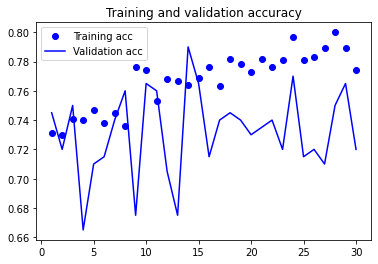

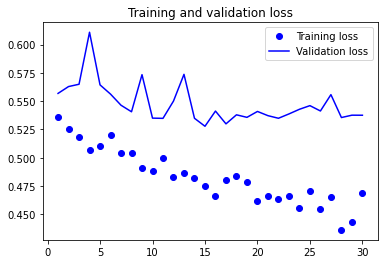

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

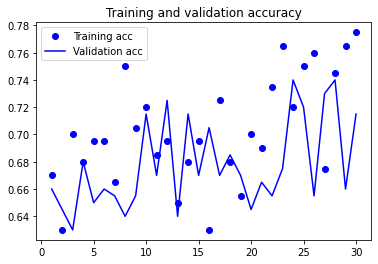

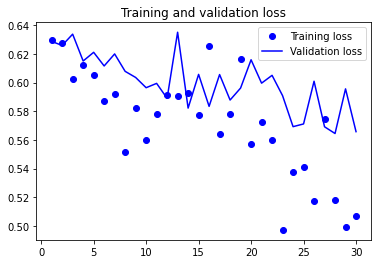

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

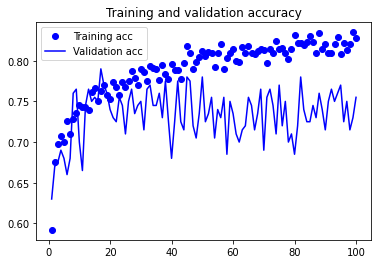

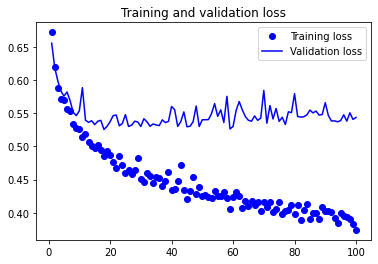

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
val_acc

[0.6200000047683716]

In [16]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

img_path = 'C:/Users/rani/Desktop/Documents/ruchi1.jpg'
your_target_size=(150,150,3)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(your_target_size))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)


# features = conv_base.predict(img_array)

# Flatten the features 2))

model = load_model('pretrain_model_cnn.h5')
# Make predictions using the trained model
predictions = model.predict(img_array)

# Interpret the results (assuming binary classification)
class_label = "Formal" if predictions[0][0] < 0.5 else "Informal"
confidence = predictions[0][0]

print(f"Predicted class: {class_label}")
print(f"Confidence: {confidence}")

1/1 [==============================] - 0s 221ms/step
Predicted class: Informal
Confidence: 1.0
